FourierCats.ipynb
==

---------------------------------

‹ FourierCats.ipynb › Copyright (C) ‹ 2017 › ‹ Anna Scaife - anna.scaife@manchester.ac.uk ›
This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with this program. If not, see http://www.gnu.org/licenses/.

---------------------------------

[AMS - 170905] Notebook created for **TIARA Astrostatistics Summer School, Taipei, September 2017**.

This notebook presents some simple properties of Fourier space and accompanies the lecture: "Imaging the Invisible"

It uses a number of Python libraries, which are all installable using **pip**.

---------------------------------


We want plotting inline in the notebook:

In [1]:
%matplotlib inline

We need to import some libraries:

In [2]:
import numpy as np   # for array manipulation and the fft
import pylab as pl   # for plotting
import cv2           # for image file handling

Open up the input image:

In [3]:
cat = cv2.imread('./FIGURES/cat1.jpg',0)

...and let's take a look at it:

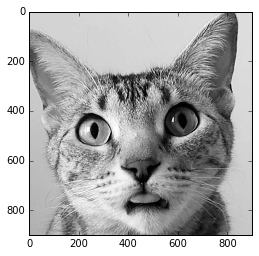

In [4]:
pl.imshow(cat,cmap='gray')
pl.show()

Next we'll dive straight in and Fourier Transform our cat. Note that there are a couple of steps to this, the first is the fft itself and the second is an fft "shift". This is necessary because of the way that the frequency space is ordered in the Fourier Transform.

In [5]:
cat_squiggle = np.fft.fft2(cat)
cat_squiggle_shifted = np.fft.fftshift(cat_squiggle)
cat_spectrum = 20*np.log(np.abs(cat_squiggle_shifted))

Let's see how that looks:

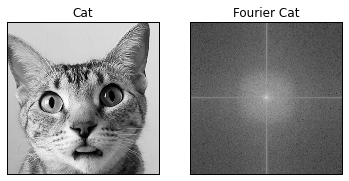

In [6]:
pl.subplot(121),pl.imshow(cat, cmap = 'gray')
pl.title('Cat'), pl.xticks([]), pl.yticks([])
pl.subplot(122),pl.imshow(cat_spectrum, cmap = 'gray')
pl.title('Fourier Cat'), pl.xticks([]), pl.yticks([])
pl.show()

Now we can set things up for filtering our Fourier Cat. We need to know (1) the dimenions of the image and (2) where the centre is.

In [7]:
rows, cols = cat.shape
crow,ccol = rows/2 , cols/2

To start with, let's make a filter function that separates the inner most 40 x 40 pixels from everything else.

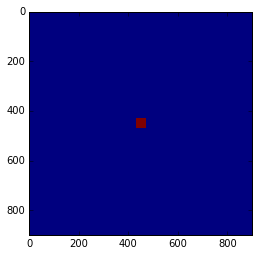

In [8]:
filter_fnc = np.zeros(cat_squiggle_shifted.shape)
filter_fnc[crow-20:crow+20, ccol-20:ccol+20] = 1.0
pl.imshow(filter_fnc)
pl.show()

We can then use this filter to, firstly, mask out the inner most 40 x 40 pixels in Fourier space. This removes our small Fourier frequencies, i.e. the large scale information in our image.

In [9]:
cat_squiggle_hpf = np.copy(cat_squiggle_shifted)
cat_squiggle_hpf[np.where(filter_fnc==1.)] = 0.0+0*1j

We can then Fourier transform this back into image space.

In [10]:
cat_filtered = np.fft.ifftshift(cat_squiggle_hpf)
cat_filtered_hpf = np.fft.ifft2(cat_filtered)
cat_filtered_hpf = np.abs(cat_filtered_hpf)

...and, see how it looks.

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


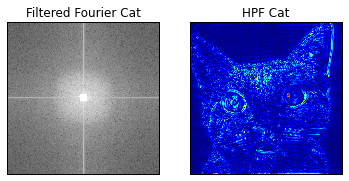

In [11]:
#pl.subplot(121),pl.imshow(cat, cmap = 'gray')
#pl.title('Image'), pl.xticks([]), pl.yticks([])
pl.subplot(121),pl.imshow(20*np.log(np.abs(cat_squiggle_hpf)), cmap = 'gray')
pl.title('Filtered Fourier Cat'), pl.xticks([]), pl.yticks([])
pl.subplot(122),pl.imshow(cat_filtered_hpf)
pl.title('HPF Cat'), pl.xticks([]), pl.yticks([])
pl.show()

Now let's filter out the large Fourier frequencies:

In [12]:
cat_squiggle_lpf = np.copy(cat_squiggle_shifted)
cat_squiggle_lpf[np.where(filter_fnc==0.)] = 0.+0.*1j

and Fourier transform that back into image space:

In [13]:
cat_filtered = np.fft.ifftshift(cat_squiggle_lpf)
cat_filtered_lpf = np.fft.ifft2(cat_filtered)
cat_filtered_lpf = np.abs(cat_filtered_lpf)

This looks like:

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


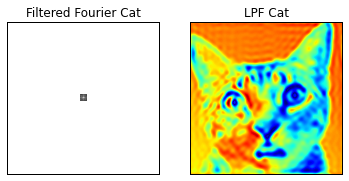

In [14]:
#pl.subplot(121),pl.imshow(cat, cmap = 'gray')
#pl.title('Cat'), pl.xticks([]), pl.yticks([])
pl.subplot(121),pl.imshow(20*np.log(np.abs(cat_squiggle_lpf)), cmap = 'gray')
pl.title('Filtered Fourier Cat'), pl.xticks([]), pl.yticks([])
pl.subplot(122),pl.imshow(cat_filtered_lpf)
pl.title('LPF Cat'), pl.xticks([]), pl.yticks([])
pl.show()

We can also take the Fourier Transform of the filter function to see how the PSF looks:

In [15]:
psf = np.fft.ifft2(filter_fnc)
psf = np.fft.ifftshift(psf)
psf = np.abs(psf)

Let's use that to make the plot from the lecture:

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


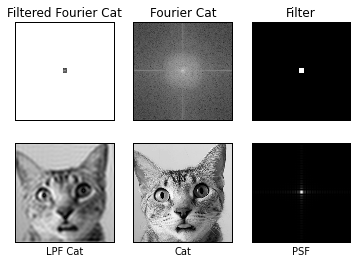

In [17]:
pl.subplot(231),pl.imshow(20*np.log(np.abs(cat_squiggle_lpf)), cmap = 'gray')
pl.title('Filtered Fourier Cat'), pl.xticks([]), pl.yticks([])
pl.subplot(232),pl.imshow(20*np.log(np.abs(cat_squiggle_shifted)), cmap = 'gray')
pl.title('Fourier Cat'), pl.xticks([]), pl.yticks([])
pl.subplot(233),pl.imshow(filter_fnc, cmap = 'gray')
pl.title('Filter'), pl.xticks([]), pl.yticks([])

pl.subplot(234),pl.imshow(cat_filtered_lpf, cmap = 'gray')
pl.xlabel('LPF Cat'), pl.xticks([]), pl.yticks([])
pl.subplot(235),pl.imshow(cat, cmap = 'gray')
pl.xlabel('Cat'), pl.xticks([]), pl.yticks([])
pl.subplot(236),pl.imshow(psf, cmap = 'gray')
pl.xlabel('PSF'), pl.xticks([]), pl.yticks([])
pl.show()

What about... instead of filtering out a contiguous range of Fourier frequencies, we rnadomly selected the Fourier components?

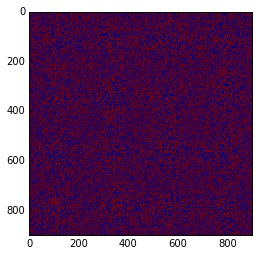

In [18]:
filter_mask = np.random.randint(2, size=cat_squiggle_shifted.shape)
pl.imshow(filter_mask)
pl.show()

In [19]:
cat_squiggle_msk = np.copy(cat_squiggle_shifted)
cat_squiggle_msk[np.where(filter_mask==0.)] = 0.+0.*1j

In [20]:
cat_filtered = np.fft.ifftshift(cat_squiggle_msk)
cat_filtered_msk = np.fft.ifft2(cat_filtered)
cat_filtered_msk = np.abs(cat_filtered_msk)

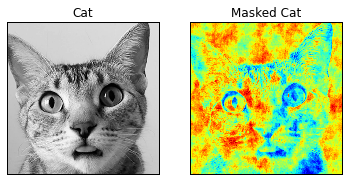

In [21]:
pl.subplot(121),pl.imshow(cat, cmap = 'gray')
pl.title('Cat'), pl.xticks([]), pl.yticks([])
#pl.subplot(132),pl.imshow(20*np.log(np.abs(cat_squiggle_msk)), cmap = 'gray')
#pl.title('Filtered Fourier Cat'), pl.xticks([]), pl.yticks([])
pl.subplot(122),pl.imshow(cat_filtered_msk)
pl.title('Masked Cat'), pl.xticks([]), pl.yticks([])
pl.show()

***The END!***